# Analyzing Ford GoBick Trip Data
## by (Fatimah Al-Matar)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco
Bay area. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### 1- Gathering Data

In [2]:
bike_df = pd.read_csv("c:/201902-fordgobike-tripdata.csv")
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### 2- Assessing Data

In [3]:
bike_df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
178040,453,2019-02-01 18:01:35.0930,2019-02-01 18:09:08.3130,130.0,22nd St Caltrain Station,37.757288,-122.392051,114.0,Rhode Island St at 17th St,37.764478,-122.402570,5572,Subscriber,1989.0,Male,No
13758,2034,2019-02-27 14:26:01.4030,2019-02-27 14:59:56.1180,370.0,Jones St at Post St,37.787327,-122.413278,369.0,Hyde St at Post St,37.787349,-122.416651,6165,Subscriber,1998.0,Female,No
158644,202,2019-02-05 18:52:52.1620,2019-02-05 18:56:14.7620,86.0,Market St at Dolores St,37.769305,-122.426826,105.0,16th St at Prosper St,37.764285,-122.431804,5315,Subscriber,1976.0,Male,No
162499,595,2019-02-05 11:16:50.9110,2019-02-05 11:26:46.8660,16.0,Steuart St at Market St,37.794130,-122.394430,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4400,Subscriber,1980.0,Male,No
144309,618,2019-02-07 12:36:28.5200,2019-02-07 12:46:46.6550,109.0,17th St at Valencia St,37.763316,-122.421904,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1321,Subscriber,1978.0,Male,No
98888,2816,2019-02-15 03:49:16.6930,2019-02-15 04:36:13.4760,227.0,Foothill Blvd at Fruitvale Ave,37.783757,-122.222603,210.0,45th St at Manila,37.833294,-122.256224,4577,Subscriber,1992.0,Female,No
47300,430,2019-02-22 08:54:25.4120,2019-02-22 09:01:35.8100,107.0,17th St at Dolores St,37.763015,-122.426497,112.0,Harrison St at 17th St,37.763847,-122.413004,673,Subscriber,1995.0,Female,No
84634,941,2019-02-17 16:58:11.9940,2019-02-17 17:13:53.0230,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,345.0,Hubbell St at 16th St,37.766483,-122.398279,4397,Customer,1987.0,Male,No
58900,1069,2019-02-20 21:48:00.8550,2019-02-20 22:05:50.5080,114.0,Rhode Island St at 17th St,37.764478,-122.402570,10.0,Washington St at Kearny St,37.795393,-122.404770,5841,Subscriber,1992.0,Male,No
112070,331,2019-02-12 16:15:22.9950,2019-02-12 16:20:54.7210,47.0,4th St at Harrison St,37.780955,-122.399749,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,4647,Subscriber,1961.0,Male,No


In [4]:
#check how many rows and columns are in the dataset:

bike_df.shape

(183412, 16)

In [5]:
#check the datatypes of every attribute in the dataset and see which columns have missing values:

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#To have a breif overview about some statistics on dataset columns:

bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
#Finding the number of missing values in each and every column:

bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#find the number of duplicated rows
sum(bike_df.duplicated())

0

In [9]:
bike_df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [10]:
bike_df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

**Assessment Results**

1- The dataset has many missing values.

2- Invalid data type in (start_time, end_time, start_station_id, end_station_id,bike_id, member_gender, user_type)

3- The trip duration is in seconds.

4- some columns are not necessary in the analysis and visualization

5- There is no "Day" column to 

### 3- Cleaning Data

In [11]:
#copy the dataframe into new one

bike_clean = bike_df.copy()

1- The dataset has many missing values.

**DEFINE**

Drop all null values.

**CODE**

In [12]:
# Return the boolean value of the exsistance of null values
bike_clean.isnull().sum().any()

True

In [13]:
#drop the nulls
bike_clean.dropna(inplace=True)

**TEST**

In [14]:
# to check if the above "drop()" function worked 
bike_clean.isnull().sum().any()

False

In [15]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

2- Invalid data type in (start_time, end_time, start_station_id, end_station_id,bike_id, member_gender, user_type)

**DEFINE**

Change "start_time" & "end_time" from Object to Datetime data type

Change "start_station_id" & "end_station_id" from Float to String, and "bike_id" from Int to String

Change "member_gender" & "user_type" & "bike_share_for_all_trip" from Object to Category 

**CODE**

In [16]:
bike_clean.start_time = pd.to_datetime(bike_clean.start_time)
bike_clean.end_time = pd.to_datetime(bike_clean.end_time)
bike_clean[["start_station_id", "end_station_id", "bike_id"]] = bike_clean[["start_station_id", "end_station_id", "bike_id"]].astype(str)
bike_clean[["member_gender", "user_type", "bike_share_for_all_trip"]] = bike_clean[["member_gender", "user_type","bike_share_for_all_trip"]].astype('category')

**TEST**

In [17]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

3- The trip duration is in seconds.

**DEFINE**

Add more columns that have the trip duration in Minuts, Hours and Days. Also, I will extract the member age from his/her birth year.

**CODE**

In [18]:
bike_clean.insert(1, "duration_minutes", bike_clean.duration_sec/60)
bike_clean.insert(2, "duration_hours", bike_clean.start_time.dt.hour)
bike_clean["start_day"] = bike_clean["start_time"].dt.strftime("%a")

In [19]:
bike_clean["member_age"] = 2021 - bike_clean["member_birth_year"]

**TEST**

In [20]:
bike_clean.head(5)

,duration_sec,duration_minutes,duration_hours,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,member_age
0,52185,869.750000,17,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thu,37.0
2,61854,1030.900000,12,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thu,49.0
3,36490,608.166667,17,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thu,32.0
4,1585,26.416667,23,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thu,47.0
5,1793,29.883333,23,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thu,62.0


4- some columns are not necessary in the analysis and visualization

**DEFINE**

Drop all unnesseceray columns

**CODE**

In [21]:
bike_clean.drop(["start_station_latitude", "start_station_longitude", "start_station_name", "end_station_latitude", "end_station_longitude", "end_station_name"], inplace=True, axis=1)

**TEST**

In [22]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   duration_minutes         174952 non-null  float64       
 2   duration_hours           174952 non-null  int64         
 3   start_time               174952 non-null  datetime64[ns]
 4   end_time                 174952 non-null  datetime64[ns]
 5   start_station_id         174952 non-null  object        
 6   end_station_id           174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  category      
 11  bike_share_for_all_trip  174952 non-null  category      
 12  start_day       

In [23]:
bike_clean.describe()

,duration_sec,duration_minutes,duration_hours,member_birth_year,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,11.733379,13.456165,1984.803135,36.196865
std,1642.204905,27.370082,4.734282,10.118731,10.118731
min,61.000000,1.016667,0.000000,1878.000000,20.000000
25%,323.000000,5.383333,9.000000,1980.000000,29.000000
50%,510.000000,8.500000,14.000000,1987.000000,34.000000
75%,789.000000,13.150000,17.000000,1992.000000,41.000000
max,84548.000000,1409.133333,23.000000,2001.000000,143.000000


### What is the structure of your dataset?

> After cleaning the dataset, it has 174952 rows with 14 different attributes.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in investigating more on the trip duration (duration_sec) and (duration_minutes), and the trip's members genders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Members' gender and type. Duration hours and minutes

## Univariate Exploration

### I will explore the distribution of the Trip Duration in Seconds and Minutes

Text(0.5, 1, 'The Frequency of Trip Duration in Seconds')

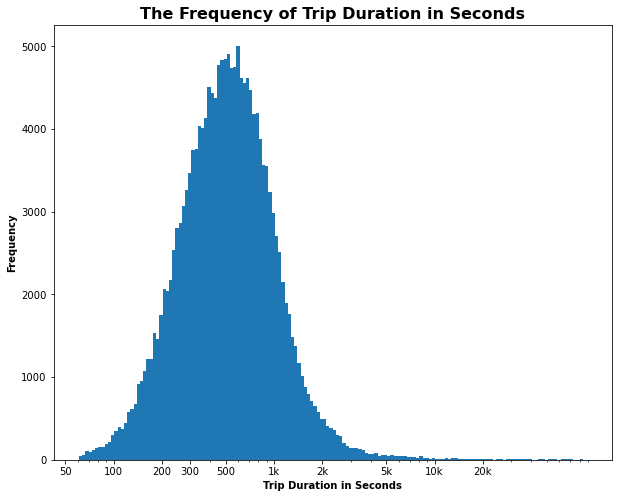

In [24]:
#Duration of the bike ride in seconds
plt.figure(figsize=[10,8])
bins= 10** np.arange(np.log10(bike_clean.duration_sec.min()), np.log10(bike_clean.duration_sec.max())+0.02, 0.02)
plt.hist(data=bike_clean, x='duration_sec',bins=bins)
plt.xscale('log')
plt.xticks([50,100,200,300,500, 1e3, 2e3, 5e3, 1e4, 2e4], [50,100,200,300,500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Trip Duration in Seconds', fontweight = "bold")
plt.ylabel('Frequency', fontweight = "bold");
plt.title("The Frequency of Trip Duration in Seconds", fontweight = "bold", fontsize= 16, y = 1)

**From the above Histogram, it looks clearly that the duration in seconds is normally distributed, and an average ride duration is close to 500 seconds, which is approximatly about 8 to 10 minutes.** 

Text(0.5, 1, 'The Frequency of Trip Duration in Minutes')

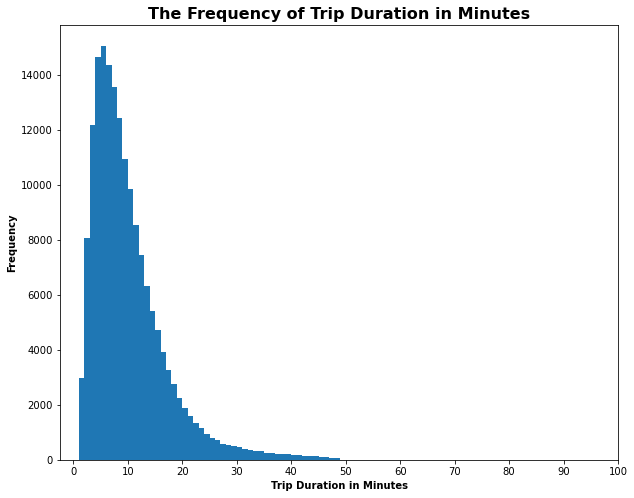

In [25]:
#Duration of the bike ride in minutes
plt.figure(figsize=[10,8])
bin_edges = np.arange(0,50,1)
x_ticks = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['{}'.format(val) for val in x_ticks]
plt.hist(data=bike_clean, x='duration_minutes',bins=bin_edges, rwidth = 1)
plt.xticks(x_ticks, labels)
plt.xlabel('Trip Duration in Minutes',fontweight = "bold")
plt.ylabel('Frequency', fontweight = "bold");
plt.title("The Frequency of Trip Duration in Minutes", fontweight = "bold", fontsize= 16, y = 1)

**From the Histogram that shows the distribution of the trip duration in minuts, we see that the average ride time is approximatly between 5 to 10 minutes.**

### Exploring the Distribution of Genders who Ride the Bikes the Most

Text(0.5, 1, 'The Distribution of Genders')

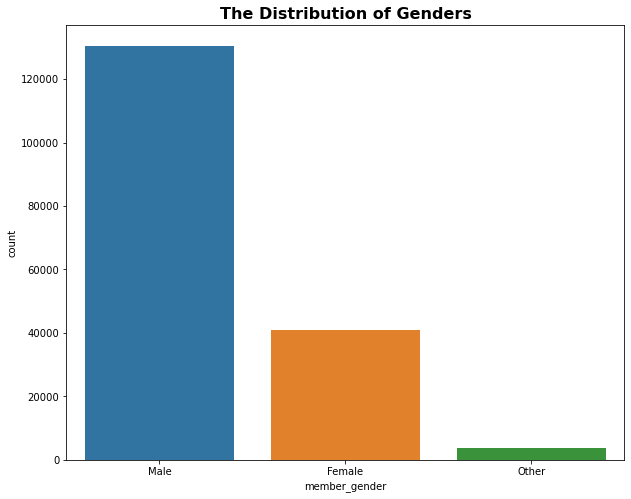

In [26]:
# Static-ordering the bars
plt.figure(figsize=[10,8])
freq = bike_clean['member_gender'].value_counts()
# Get the indexes of the Series
gen_order = freq.index
# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=bike_clean, x='member_gender', order=gen_order);
plt.title("The Distribution of Genders", fontweight = "bold", fontsize= 16, y = 1)

**The Bar Chart shows the frequency of the member's gender, "Male" appears to be the most frequent gender with more than 130,000 member, followed by "Female" with about 40,000 member and finllay "Other" gender with less than 20,000(about 4000)**

### Exploring the Distribution of User Types who Ride the Bikes the Most

Text(0.5, 1, 'The Distribution of User Types')

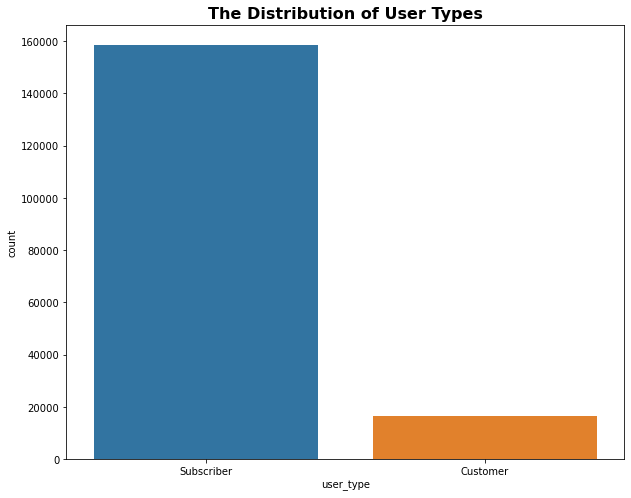

In [27]:
plt.figure(figsize=[10,8])
# Returns a Series
freq = bike_clean['user_type'].value_counts()
# Get the indexes of the Series
user_order = freq.index
# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=bike_clean, x='user_type', order=user_order);
plt.title("The Distribution of User Types", fontweight = "bold", fontsize= 16, y = 1)

**From the above Bar Chart, Subscribers have more riding frequencies than Customers.**

### Exploring the Distribution of Bike Ride Days

Text(0.5, 1, 'The Distribution of Days')

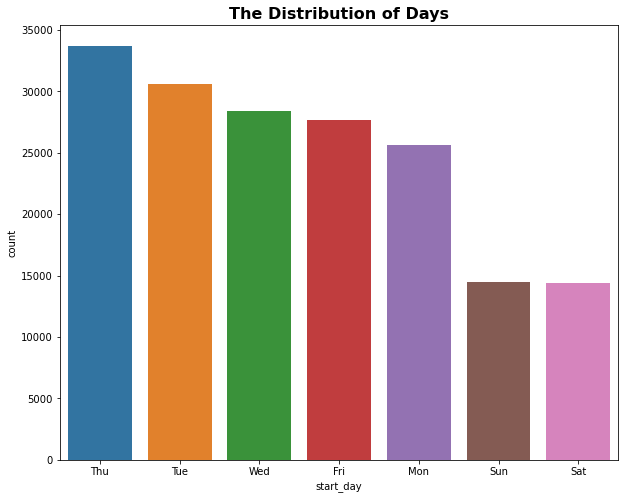

In [28]:
plt.figure(figsize=[10,8])
# Returns a Series
freq = bike_clean['start_day'].value_counts()
# Get the indexes of the Series
day_order = freq.index
# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=bike_clean, x='start_day', order=day_order);
plt.title("The Distribution of Days", fontweight = "bold", fontsize= 16, y = 1)

**The above Bar Chart shows that Thursdays appear to be the most frequent days that people prefer to ride the bikes on, wherease Sundays and Saturdays are the least**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No need for any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusal distributions. However, I have made some transformations on the "duration_sec" column to have another attribute "duration_minutes" which shows the trip duration in minutes instead of seconds.

## Bivariate Exploration

### Exploring the Relationship between the Member's Age and the Trip Duration in Minutes

Text(0, 0.5, 'Trip Duration in Minutes')

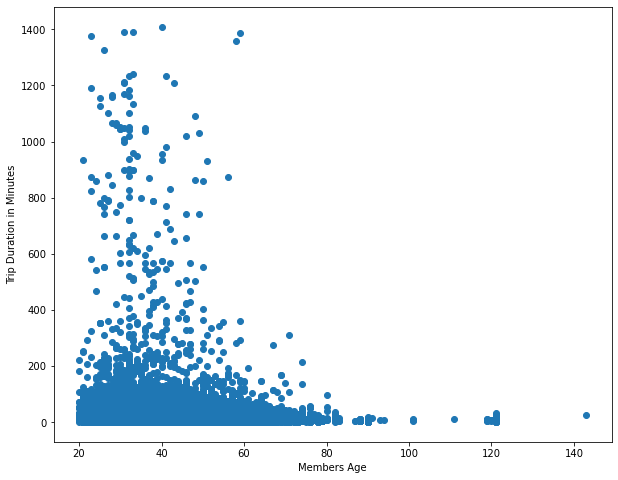

In [29]:
#Duration of the bike ride in minutes
plt.figure(figsize=[10,8])
#x_ticks = np.arange(0,100,10)
#y_ticks = np.arange(0,60,10)
plt.scatter(x = bike_clean["member_age"], y = bike_clean["duration_minutes"]);

#plt.xticks(x_ticks)
#plt.yticks(y_ticks)

plt.xlabel("Members Age")
plt.ylabel('Trip Duration in Minutes')

In [30]:
year = bike_clean['member_age']
time = bike_clean['duration_minutes']
correlation = year.corr(time)
print(correlation)

0.006041174875254653


**Although their is a weak correlation between the member's age and the trip duration in minutes, we can infer from the above Scatter Plot that the younger the member, the less trip duration he/she will ride the bike**

### Exploring the Relationship between the Member Gender and the Trip Duration

In [31]:
gender_classes = ['Male','Female','Other']
gclasses = pd.api.types.CategoricalDtype(ordered = True, categories = gender_classes)
bike_clean['member_gender'] = bike_clean['member_gender'].astype(gclasses);

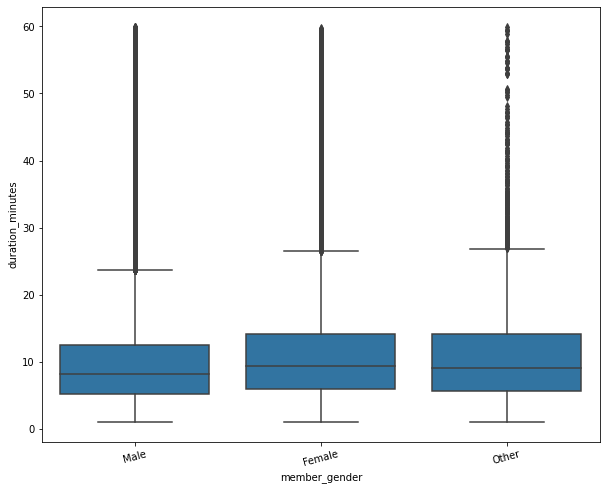

In [32]:
plt.figure(figsize=[10,8])
base_color = sb.color_palette()[0]
sb.boxplot(data=bike_clean.query("duration_minutes <=60"), x= 'member_gender',y= 'duration_minutes',color = base_color);
plt.xticks(rotation = 15);

**Although we have found the number of each gender is much different than the other, it shows up that they have the same average duration time, except for male, they have less duration time**

### Exploring the Relationship between Member's Gender and Start Days

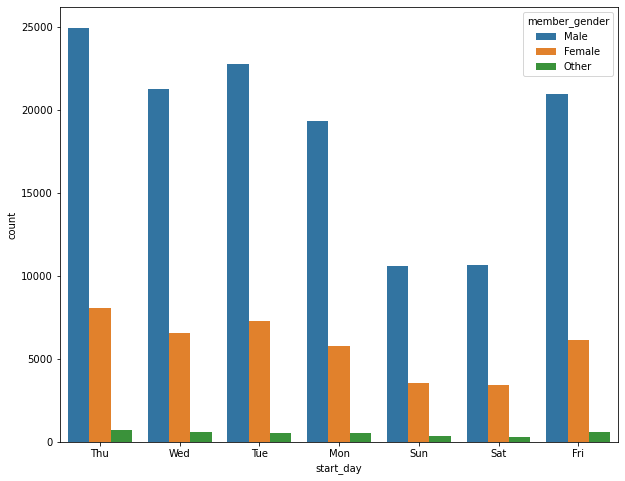

In [33]:
plt.figure(figsize=[10,8])
sb.countplot(x="start_day", hue="member_gender", data=bike_clean)

**Males seem to like riding on Thursdays, Female also like Thursdays and like to ride on Tuesdays. Others gender seem to ride on Thursdays and Wednesdays**

### Exploring the Relationship between the User Type and Trip Hours

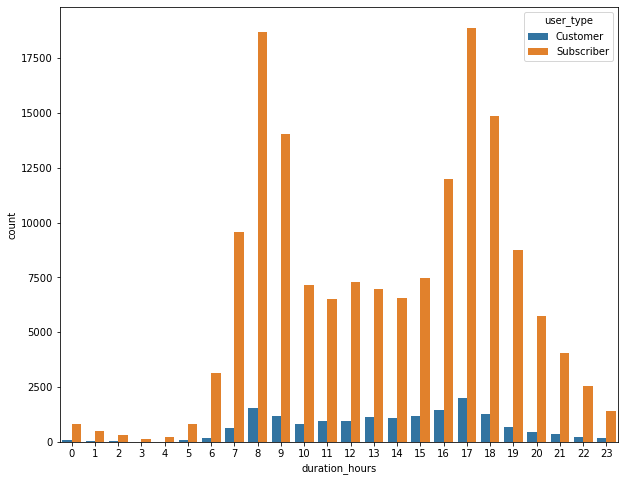

In [35]:
plt.figure(figsize=[10,8])
sb.countplot(x="duration_hours", hue="user_type", data=bike_clean)

**8:00 AM, 9:00 AM, 17:00 PM and 18:00 PM seem to be the peak hours for Subscribers. 8:00 AM, 16:00 PM and 17:00 PM are the peak hours for Cutomers riders.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

  1- Youger bikers have less duration trip compared with elderly.
 
  2- Riders prefer Thursdays and Tuesdays to ride the bikes.
  
  3- Members like to ride the bikes at 8:00 AM and 17:00 PM.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

  I found the Subscribers prefer to ride the bikes at different times compared with the Customers

## Multivariate Exploration

### Exploring the Relationship between the Members Age and Trip Duration based on their Gender

Text(0, 0.5, 'Trip Duration')

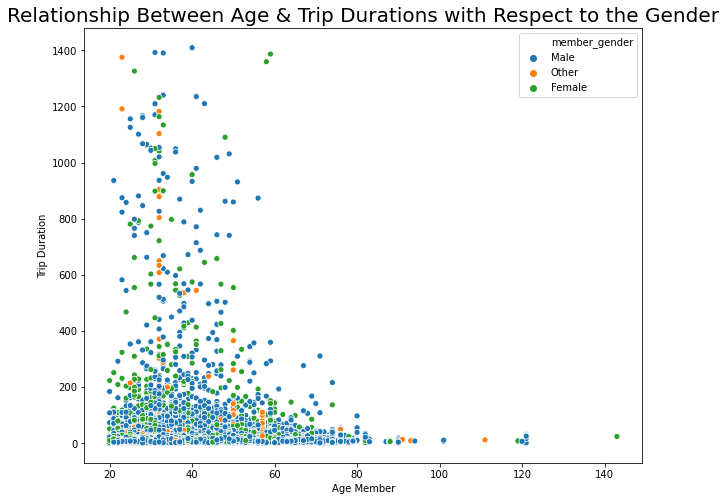

In [40]:
plt.subplots(figsize=(10,8))
sb.scatterplot(x=bike_clean["member_age"], y = bike_clean["duration_minutes"], hue= bike_clean["member_gender"])
plt.title('Relationship Between Age & Trip Durations with Respect to the Gender', fontsize=20)
plt.xlabel('Age Member', fontsize=10); 
plt.ylabel('Trip Duration', fontsize=10)

**Most of the riders are male and they are ranging from 20 to 80 years old. Males tend to finish their rides in shorter time than females do.**

### Exploring the Relationship between the Riding Usage based on User Type and Gender

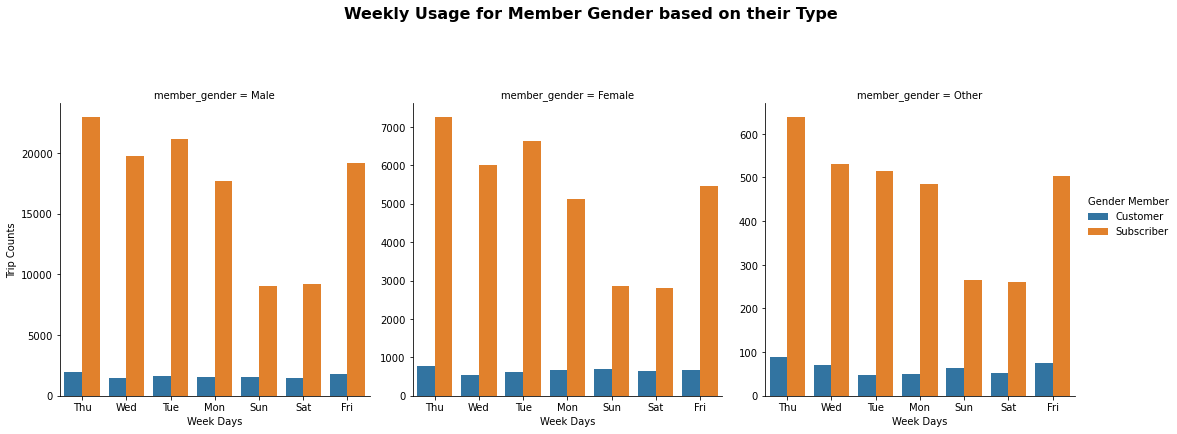

In [44]:
g = sb.catplot(data=bike_clean, x='start_day', col="member_gender",hue="user_type", kind='count', sharey = False );
g.fig.suptitle('Weekly Usage for Member Gender based on their Type',fontweight = "bold", fontsize= 16, y = 1.2);
g._legend.set_title("Gender Member")
g.set_axis_labels("Week Days", "Trip Counts")

**From the above chart, subscribers are more than cutomers. However, male subscribers and customers prefer to ride on Thursdays and Tuesdays, So do the females. Others gender prefer Thursdays and Wednesdays.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

  1- Males take less riding durations regardless of their age. Female tend to have the ride at longer durations.
  
  2- The subscribers are more than the customers. Their are some day that subscribers prefer to ride compared with customers.

### Were there any interesting or surprising interactions between features?

  1- There are peak hours where riders prefer to have a ride, morning rides are preferd
  
  2- Weekends have the least riding frequencies. 
  

### 4- Storing Data

In [45]:
bike_clean.to_csv("fordgobike_master.csv")